<a href="https://colab.research.google.com/github/bridgethom-99/CKD-Prediction/blob/main/CKD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, accuracy_score
import csv
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
df = pd.read_csv('kidney_disease.csv')
data = df

data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [9]:
data.shape


(400, 26)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Data Preprocessing

In [11]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
data_num = data[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']]
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [13]:
filna = data[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']]

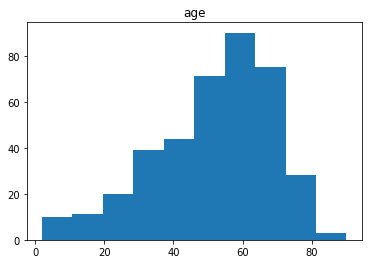

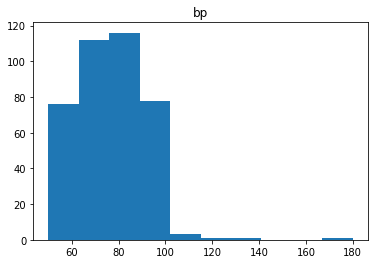

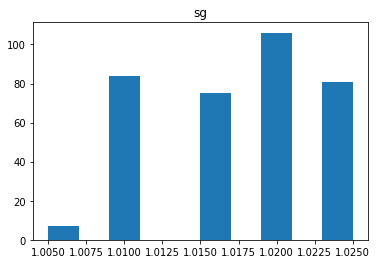

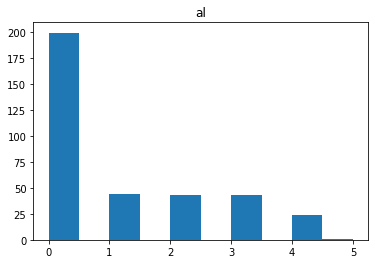

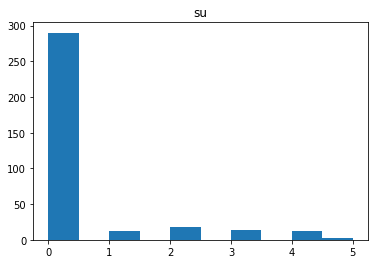

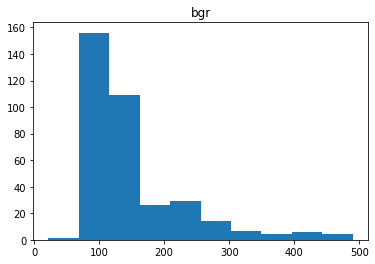

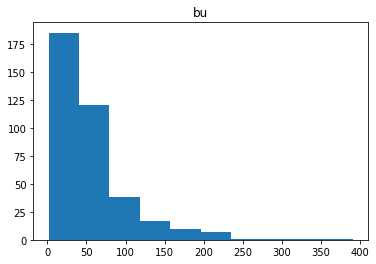

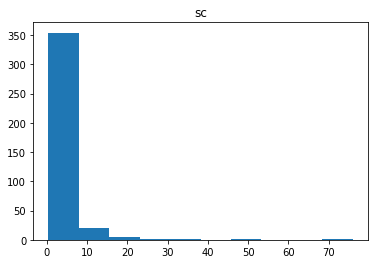

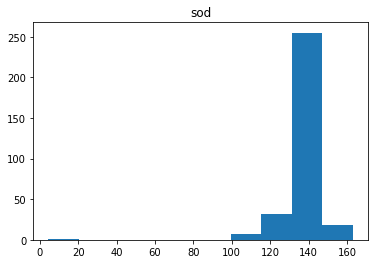

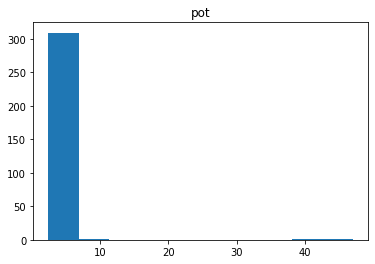

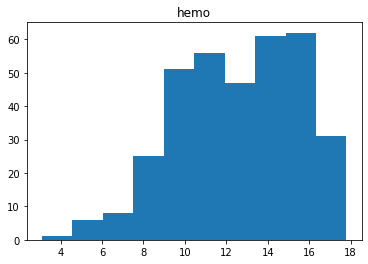

In [14]:
for i in data_num.columns:
  plt.hist(data_num[i])
  plt.title(i)
  plt.show()

In [15]:
df.corr() # Correlation matrix

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [16]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

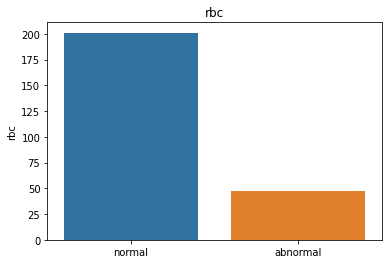

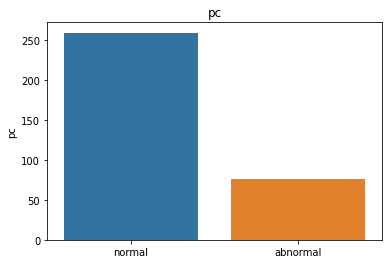

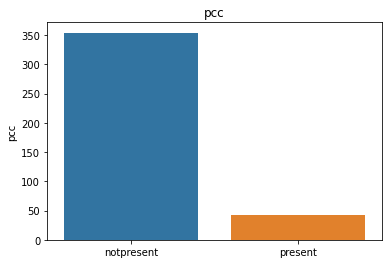

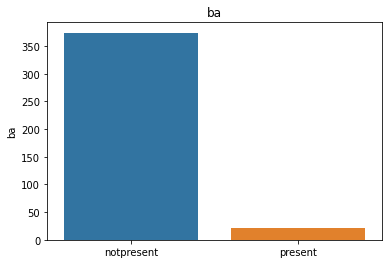

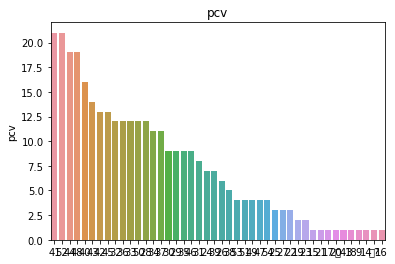

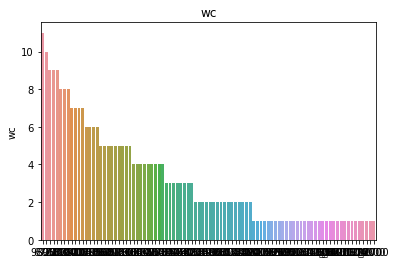

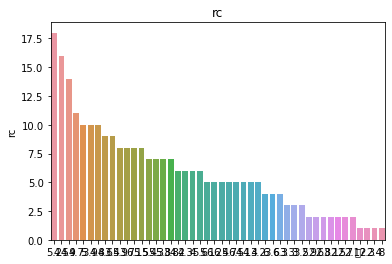

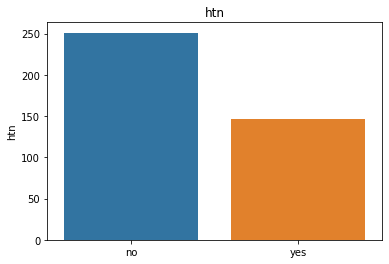

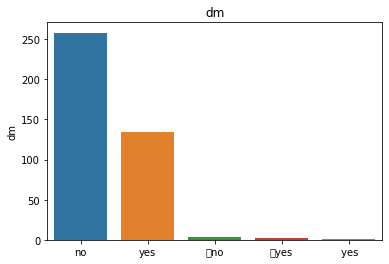

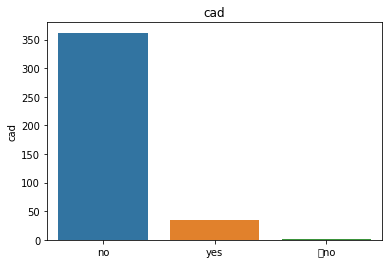

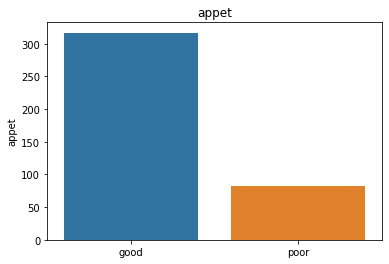

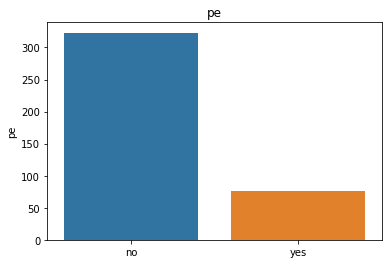

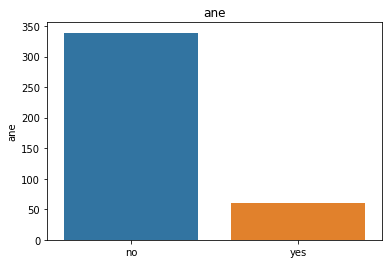

In [17]:
for i in data_cat.columns:
  sns.barplot(data_cat[i].value_counts().index, data_cat[i].value_counts()).set_title(i)
  plt.show()

<AxesSubplot:title={'center':'Count of Diagnosis of Chronic Kidney Disease'}>

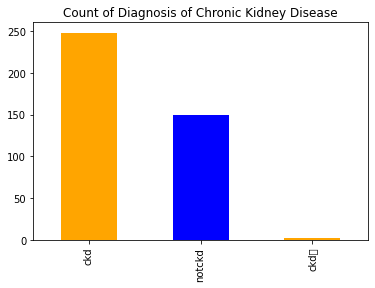

In [18]:
df['classification'].value_counts().plot(kind='bar',color=['orange','blue'],title="Count of Diagnosis of Chronic Kidney Disease")

In [19]:
print(data.classification.value_counts())
data.classification.replace("ckd\t","ckd",inplace=True)
print(data.classification.value_counts())
print("==="*20)
print(data.dm.value_counts())
data.dm.replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
print(data.dm.value_counts())
print("==="*20)
print(data.cad.value_counts())
data.cad.replace(["\tno"],["no"],inplace=True)
print(data.cad.value_counts())

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
ckd       250
notckd    150
Name: classification, dtype: int64
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no      362
yes      34
\tno      2
Name: cad, dtype: int64
no     364
yes     34
Name: cad, dtype: int64


In [20]:
for i in data_cat:
    print(pd.pivot_table(data,index='classification',columns=i, values='age'))
    print("=="*20)

rbc              abnormal     normal
classification                      
ckd             52.068182  54.610169
notckd                NaN  46.056738
pc               abnormal     normal
classification                      
ckd             55.148649  52.373913
notckd                NaN  46.056738
pcc             notpresent    present
classification                       
ckd              53.530000  59.357143
notckd           46.682759        NaN
ba              notpresent    present
classification                       
ckd              54.540909  54.545455
notckd           46.682759        NaN
pcv             \t43   \t?    15    16    17    18    19    20    21  \
classification                                                         
ckd             68.0  67.0  32.0  68.0  50.0  50.0  57.5  59.0  64.0   
notckd           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

pcv                    22  ...    46    47    48     49         50    51  \
classification             ...     

# **Data Preprocessing**

In [21]:
# Replacing unwanted text
data.rc.replace("\t?",data.rc.mode()[0], inplace=True)
data.rc = data.rc.apply(lambda x: float(x))

data.wc.replace("\t?",data.wc.mode()[0], inplace=True)
data.wc = data.wc.apply(lambda x: float(x))


data.pcv.replace(["\t?","\t43"],data.pcv.mode()[0], inplace=True)
data.pcv = data.pcv.apply(lambda x: float(x))

data.classification.replace(["ckd","notckd"],[1,0], inplace=True)

In [22]:
data_final_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
data_final_cat = data[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

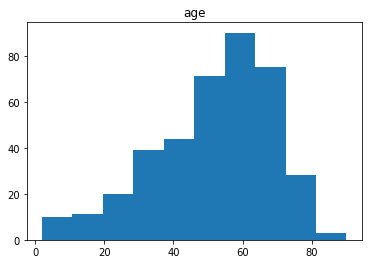

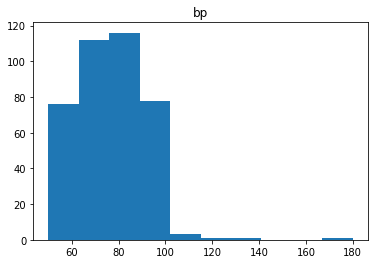

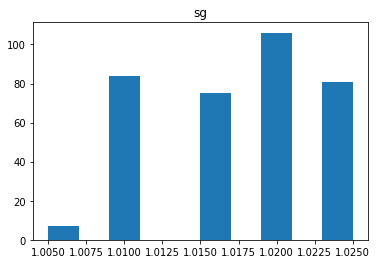

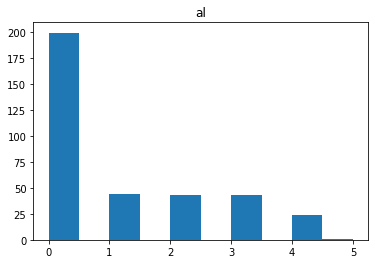

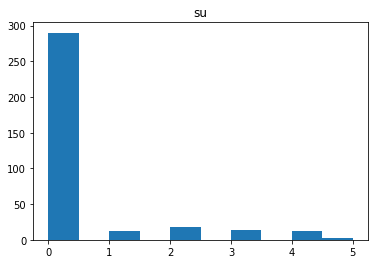

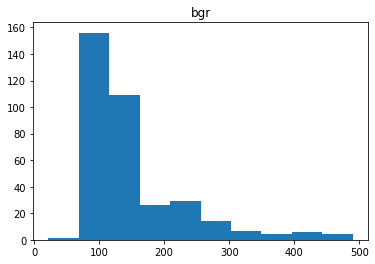

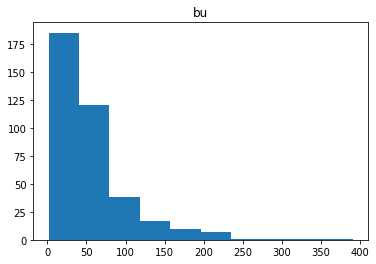

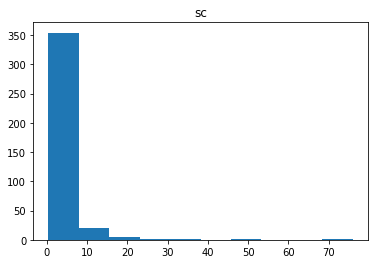

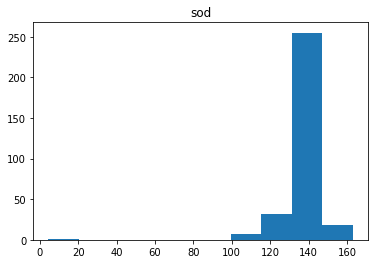

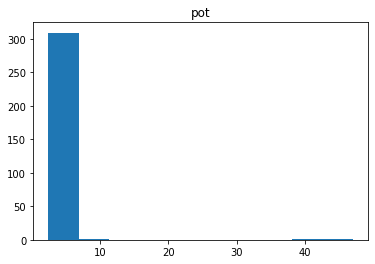

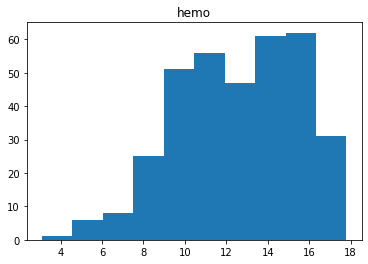

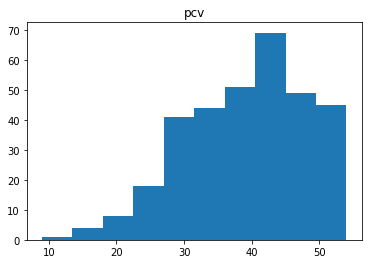

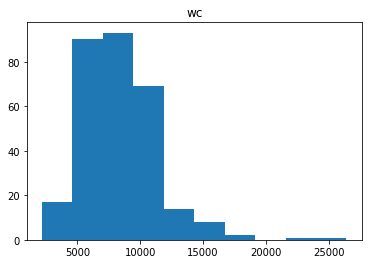

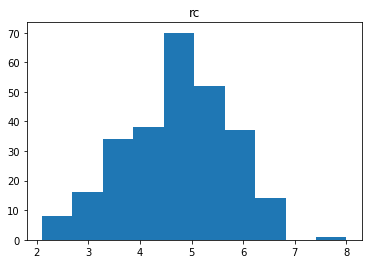

In [23]:
for i in data_final_num.columns:
    plt.hist(data_final_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

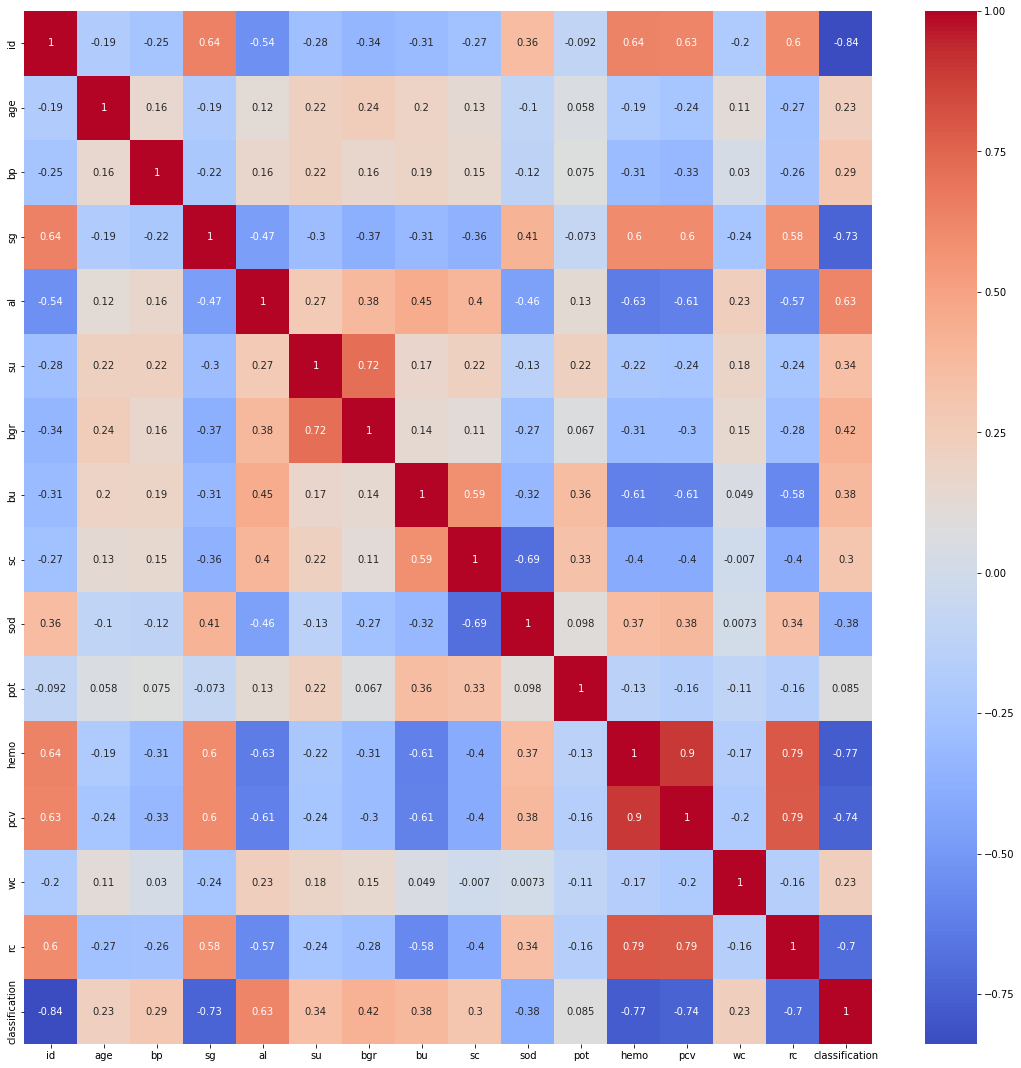

In [24]:
#Finding correlations between the plots
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

<AxesSubplot:>

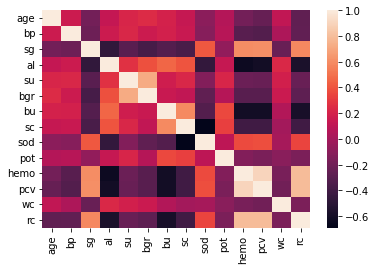

In [25]:
# With correlations sorted
sns.heatmap(data_final_num.corr())

In [26]:
for i in data_final_cat:
    print(pd.pivot_table(data,index='classification',columns=i, values='age'))
    print("=="*20)

rbc              abnormal     normal
classification                      
0                     NaN  46.056738
1               52.068182  54.610169
pc               abnormal     normal
classification                      
0                     NaN  46.056738
1               55.148649  52.373913
pcc             notpresent    present
classification                       
0                46.682759        NaN
1                53.530000  59.357143
ba              notpresent    present
classification                       
0                46.682759        NaN
1                54.540909  54.545455
htn                    no        yes
classification                      
0               46.408163        NaN
1               46.020000  60.542254
dm                     no        yes
classification                      
0               46.408163        NaN
1               47.541284  60.278195
cad                    no        yes
classification                      
0               46.408163     

In [27]:
# Dealing with missing values
for i in filna.columns:
    if data[i].isna().sum() > 0 :
        if data[i].dtype == 'float64':
            data[i].fillna(data[i].median(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)

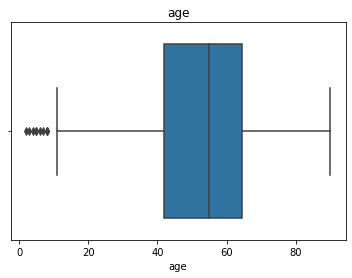

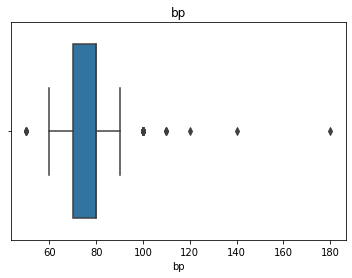

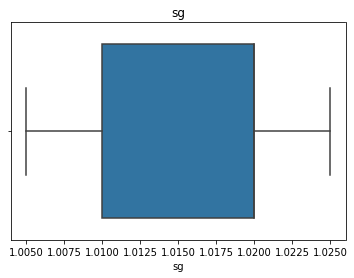

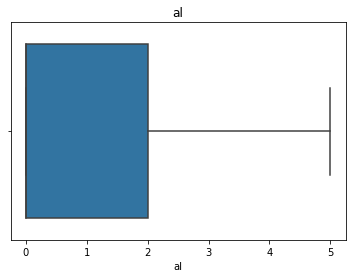

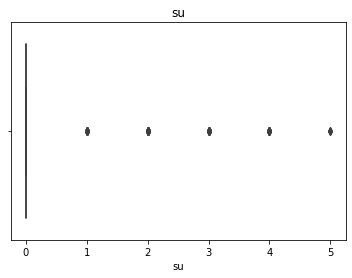

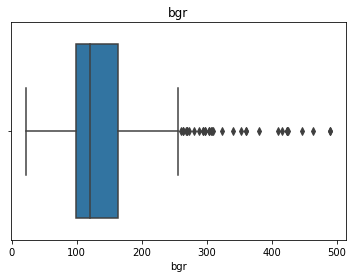

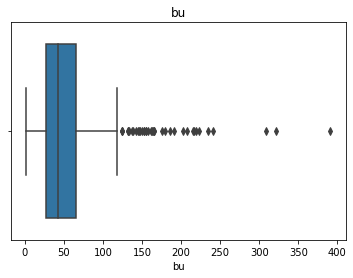

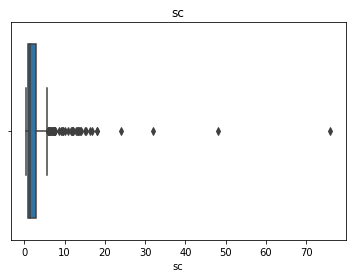

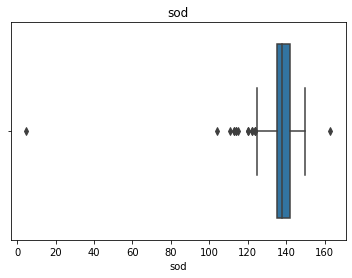

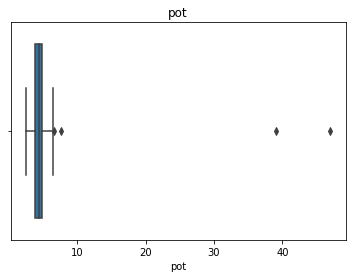

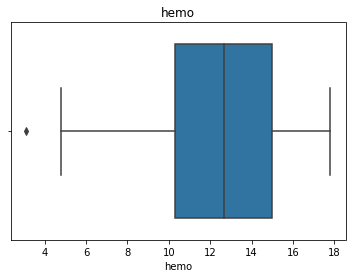

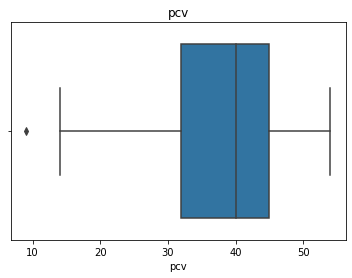

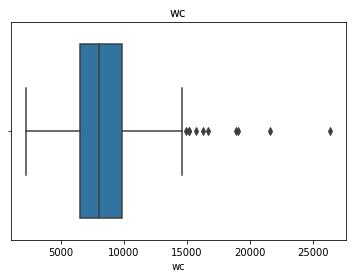

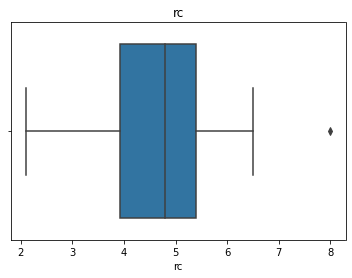

In [28]:
# Dealing with Outliers
for i in data_final_num.columns:
    sns.boxplot(data_final_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:ylabel='Frequency'>

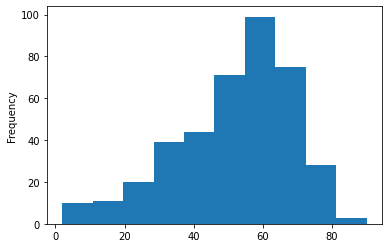

In [29]:
df['age'].plot(kind='hist') # Age distribution

In [30]:
# Data normalization to remove outliers
def outlinefree(dataCol):    
    sorted(dataCol)
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1   
    LowerRange = Q1-(1.5 * IQR)   
    UpperRange = Q3+(1.5 * IQR)   
    return LowerRange,UpperRange

In [31]:
Lowage,Upage = outlinefree(data.age)
Lowbp,Upbp = outlinefree(data.bp)
Lowsg,Upsg = outlinefree(data.sg)
Lowal,Upal = outlinefree(data.al)
Lowsu,Upsu = outlinefree(data.su)
Lowbgr,Upbgr = outlinefree(data.bgr)
Lowbu,Upbu = outlinefree(data.bu)
Lowsc,Upsc = outlinefree(data.sc)
Lowsod,Upsod = outlinefree(data.sod)
Lowpot,Uppot = outlinefree(data.pot)
Lowhemo,Uphemo = outlinefree(data.hemo)
Lowpcv,Uppcv = outlinefree(data.pcv)
Lowwc,Upwc = outlinefree(data.wc)
Lowrc,Uprc = outlinefree(data.rc)

In [32]:
data.age.replace(list(data[(data.age < Lowage)].age),Lowage , inplace=True)
data.age.replace(list(data[(data.age > Upage)].age),Upage , inplace=True)

data.bp.replace(list(data[(data.bp < Lowbp)].bp),Lowbp , inplace=True)
data.bp.replace(list(data[(data.bp > Upbp)].bp),Upbp , inplace=True)

data.sg.replace(list(data[(data.sg < Lowsg)].sg),Lowsg , inplace=True)
data.sg.replace(list(data[(data.sg > Upsg)].sg),Upsg , inplace=True)

data.al.replace(list(data[(data.al < Lowal)].al),Lowal , inplace=True)
data.al.replace(list(data[(data.al > Upal)].al),Upal , inplace=True)

data.su.replace(list(data[(data.su < Lowsu)].su),Lowsu , inplace=True)
data.su.replace(list(data[(data.su > Upsu)].su),Upsu , inplace=True)

data.bgr.replace(list(data[(data.bgr < Lowbgr)].bgr),Lowbgr , inplace=True)
data.bgr.replace(list(data[(data.bgr > Upbgr)].bgr),Upbgr , inplace=True)

data.bu.replace(list(data[(data.bu < Lowbu)].bu),Lowbu , inplace=True)
data.bu.replace(list(data[(data.bu > Upbu)].bu),Upbu , inplace=True)

data.sc.replace(list(data[(data.sc < Lowsc)].sc),Lowbu , inplace=True)
data.sc.replace(list(data[(data.sc > Upsc)].sc),Upbu , inplace=True)

data.sod.replace(list(data[(data.sod < Lowsod)].sod),Lowsod , inplace=True)
data.sod.replace(list(data[(data.sod > Upsod)].sod),Upsod , inplace=True)

data.pot.replace(list(data[(data.pot < Lowpot)].pot),Lowpot , inplace=True)
data.pot.replace(list(data[(data.pot > Uppot)].pot),Uppot , inplace=True)

data.hemo.replace(list(data[(data.hemo < Lowhemo)].hemo),Lowhemo , inplace=True)
data.hemo.replace(list(data[(data.hemo > Uphemo)].hemo),Uphemo , inplace=True)

data.pcv.replace(list(data[(data.pcv < Lowpcv)].pcv),Lowpcv , inplace=True)
data.pcv.replace(list(data[(data.pcv > Uppcv)].pcv),Uppcv , inplace=True)

data.wc.replace(list(data[(data.wc < Lowwc)].wc),Lowwc , inplace=True)
data.wc.replace(list(data[(data.wc > Upwc)].wc),Upwc , inplace=True)

data.rc.replace(list(data[(data.rc < Lowrc)].rc),Lowrc , inplace=True)
data.rc.replace(list(data[(data.rc > Uprc)].rc),Uprc , inplace=True)

In [33]:
data_final_num2 = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]

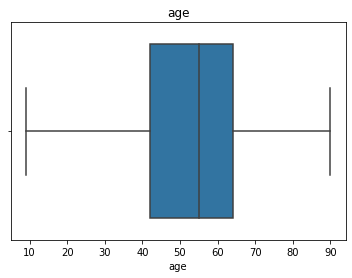

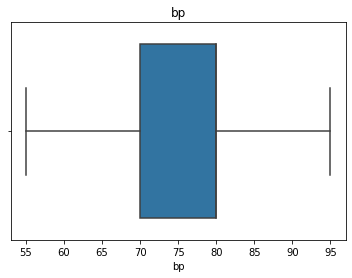

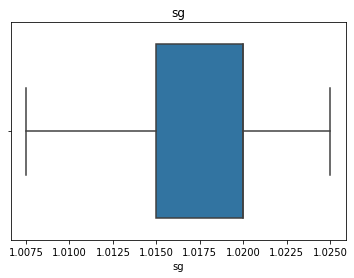

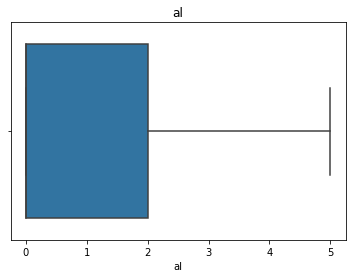

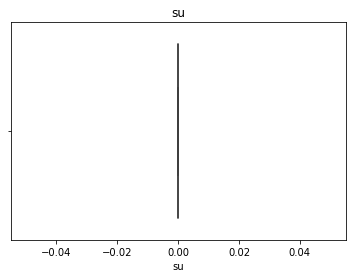

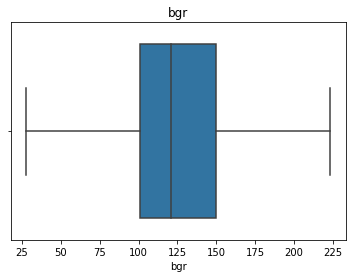

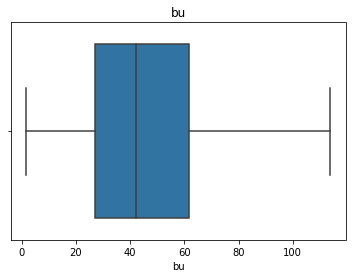

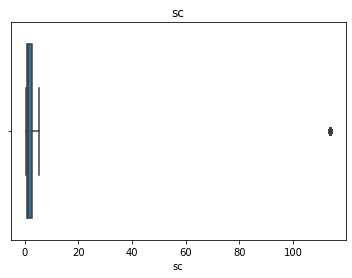

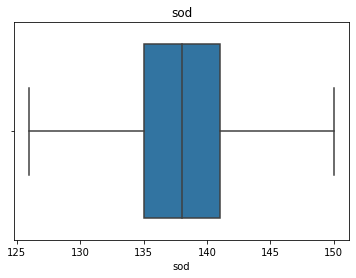

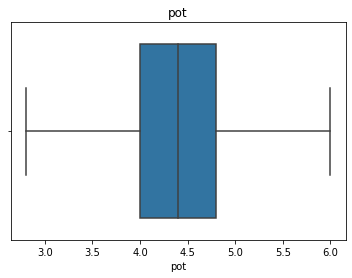

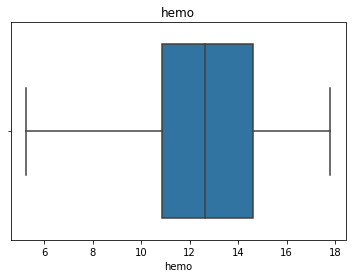

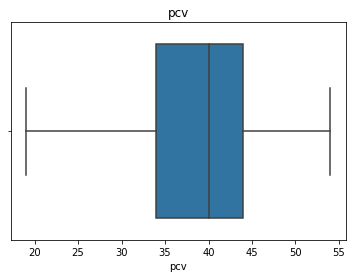

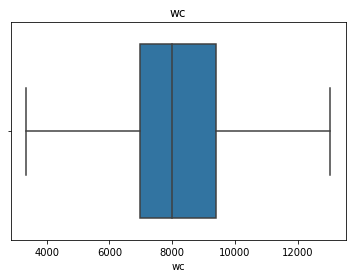

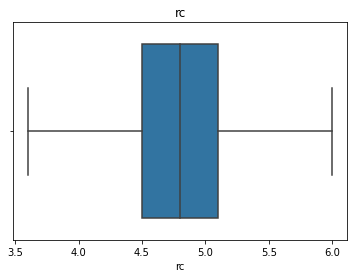

In [34]:
# Confirming that outliers have been removed from the dataset
for i in data_final_num2.columns:
    sns.boxplot(data_final_num2[i])
    plt.title(i)
    plt.show()

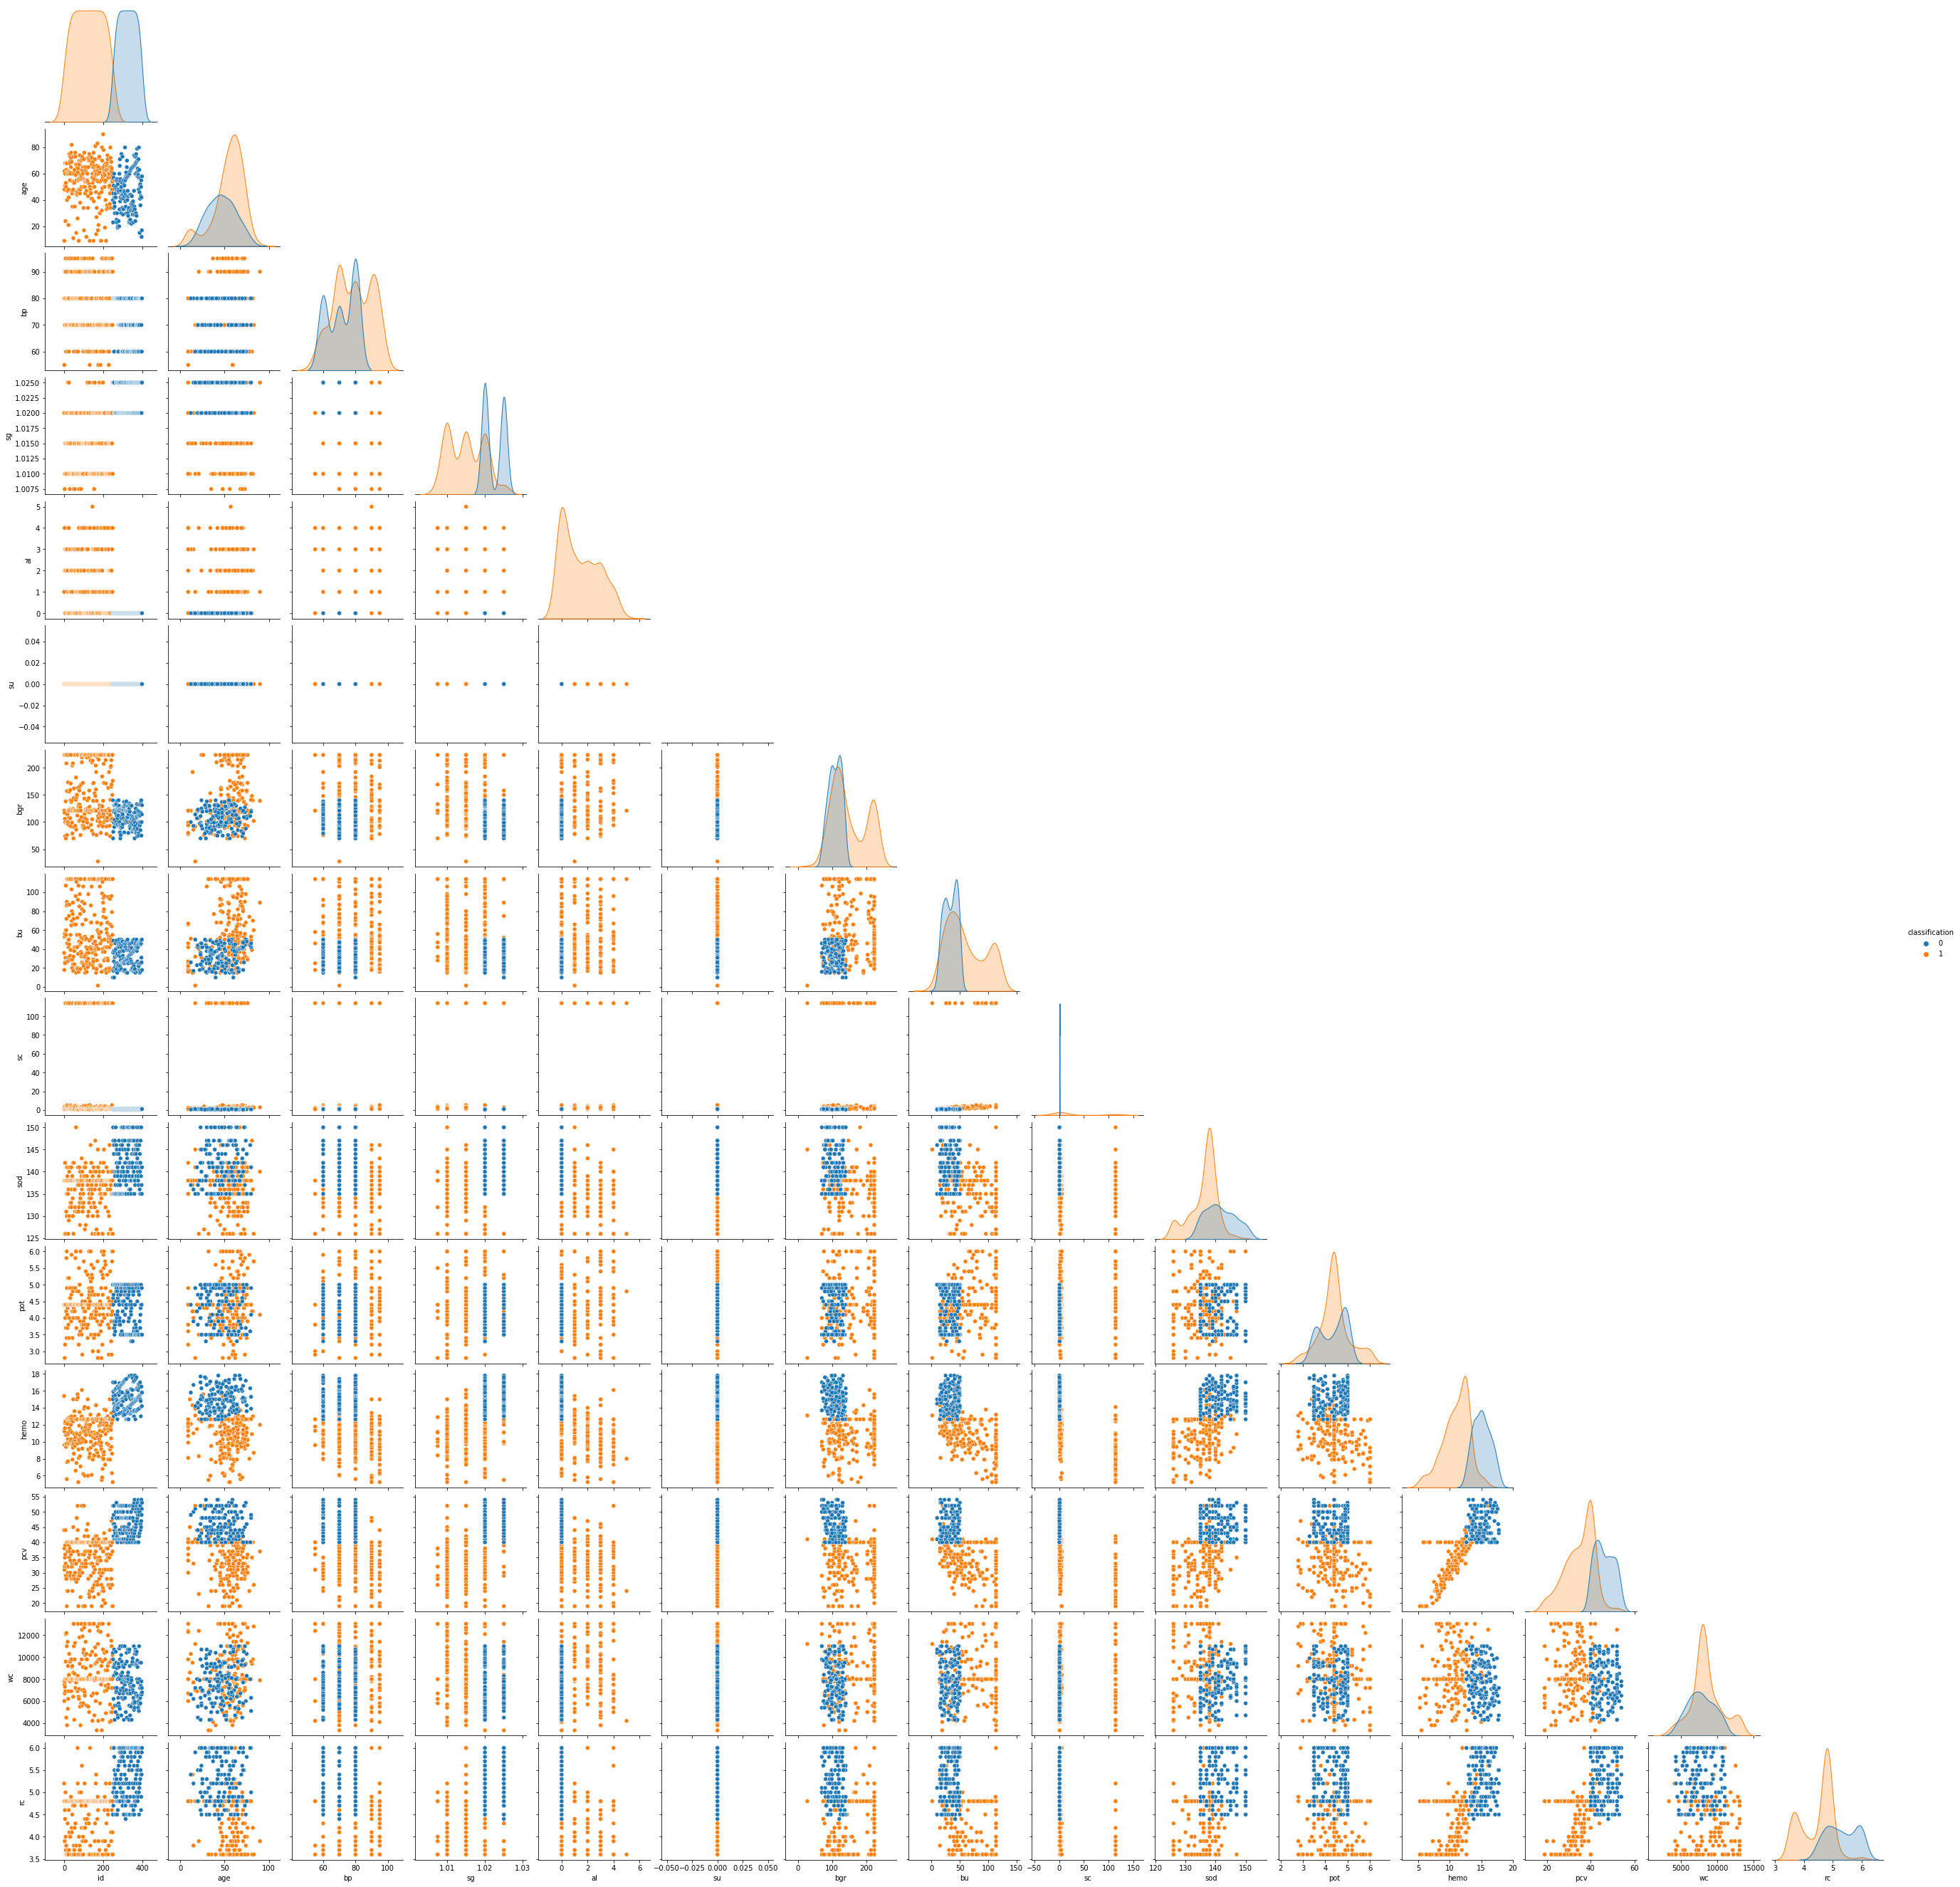

In [35]:
#Feature selection
sns.pairplot(data, hue = "classification", corner = True)

In [36]:
finaldata = data.loc[:,['classification','age','bp','sg','al','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [37]:
# Feature Engineering
final_dataset = pd.get_dummies(finaldata)

features = final_dataset.iloc[:,1:].values
label = final_dataset.iloc[:,0].values

# **Random Forest Classifier**

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size =
                                                    0.25, random_state = 110)

model = RandomForestClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train, Y_train)
trainscore = model.score(X_train, Y_train)
testscore = model.score(X_test, Y_test)

Y_pred = model.predict(X_test)
print('f1 score: ',f1_score(Y_test, Y_pred), '\n')
print(confusion_matrix(Y_test, Y_pred))

f1 score:  0.9919999999999999 

[[37  0]
 [ 1 62]]


In [39]:
print('Precision score: ',precision_score(Y_test, Y_pred),'\n')
print('Recall score: ',recall_score(Y_test, Y_pred),'\n')
print(classification_report(Y_test, Y_pred))

Precision score:  1.0 

Recall score:  0.9841269841269841 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        63

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



0.9998133333333332


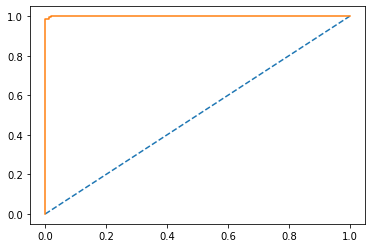

In [40]:
#Receiver Operating Characteristic Curve
#ROC AUC
prob = model.predict_proba(features)[:,1]
#AUC calculation
auc = roc_auc_score(label,prob)
print(auc)
#ROC curve calculation
fpr, tpr, threshold = roc_curve(label,prob)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)

In [41]:
accuracy_score(Y_test, Y_pred)

0.99